In [3]:
from __future__ import division
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
import pickle
import pandas as pd

In [2]:
df = pd.read_pickle("/home/dup193/work/double_pulse/data/make_plot/MakePlot_DF_All.pkl")

In [3]:
print(df.shape)
print(df.iloc[0])

(4342931, 20)
b'Distance'                                               75.478
b'Energy'                                                32941.2
b'ID'                                      (1, 4294967295, 0, 0)
b'PDG'                                                       -15
b'Qdom'                                                  265.775
b'Qst'                                                   1103.65
b'StQArr'      ((0.32499998807907104, 8), (0.4250000119209289...
CoG_x                                                   -225.509
CoG_y                                                   -72.2477
CoG_z                                                   -440.159
St_x                                                     -200.55
St_y                                                      -74.03
St_z                                                    -368.949
Qtot_a                                                    2152.3
Qtot_b                                                   2187.97
St_1       

In [5]:
cut_df = df[((abs(df[b'PDG'])) == 15) & (df['Qtot_a']>1000) & (df[b'Qst']>300) & (np.sqrt(df['CoG_x']**2 + df['CoG_y']**2)<400) & ((abs(df['CoG_z'])) < 500)].copy()
print(cut_df.shape)
cut_df.to_pickle("/home/dup193/work/double_pulse/data/make_plot/MakePlot_DF_Cut.pkl")

(711691, 20)


In [168]:
cdf = pd.read_pickle("/home/dup193/work/double_pulse/data/make_plot/MakePlot_DF_Cut.pkl")

In [169]:
cdf[b'Energy'] = cdf[b'Energy'].apply(lambda x: x/1000)

In [170]:
cdf_300 = cdf[cdf[b'Energy']>300].copy()
cdf_500 = cdf[cdf[b'Energy']>500].copy()
cdf_2000 = cdf[cdf[b'Energy']>2000].copy()

In [171]:
cdf['Weights'] = np.ones(cdf.shape[0])/cdf.shape[0]
cdf_300['Weights'] = np.ones(cdf_300.shape[0])/cdf_300.shape[0]
cdf_500['Weights'] = np.ones(cdf_500.shape[0])/cdf_500.shape[0]
cdf_2000['Weights'] = np.ones(cdf_2000.shape[0])/cdf_2000.shape[0]

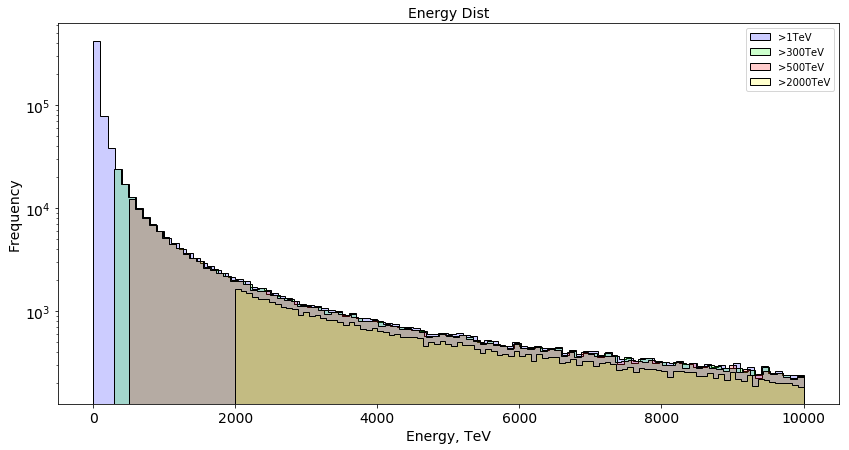

In [177]:
ax = cdf[b'Energy'].plot.hist(figsize = (14,7),bins = 100, logy= True, histtype ='step',  fill=True, fc=(0, 0, 1, 0.2), edgecolor = 'k', label = ">1TeV")#xlim =[0,1000], ylim = [10**(-4),10**(-0)])
ax = cdf_300[b'Energy'].plot.hist(bins = 100, logy= True, histtype ='step',  fill=True, fc=(0, 1, 0, 0.2), edgecolor = 'k', label = ">300TeV")#, xlim =[0,1000], ylim = [10**(-4),10**(-0)])
ax = cdf_500[b'Energy'].plot.hist(bins = 100, logy= True, histtype ='step',  fill=True, fc=(1, 0, 0, 0.2), edgecolor = 'k', label = ">500TeV")#, xlim =[0,1000], ylim = [10**(-4),10**(-0)])
ax = cdf_2000[b'Energy'].plot.hist(bins = 100, logy= True, histtype ='step',  fill=True, fc=(1, 1, 0, 0.2), edgecolor = 'k', label = ">2000TeV")#, xlim =[0,1000], ylim = [10**(-4),10**(-0)])
ax.set_title('Energy Dist', fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax.set_xlabel("Energy, TeV",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax.set_ylabel("Frequency",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax.tick_params(labelsize=14)
plt.legend()

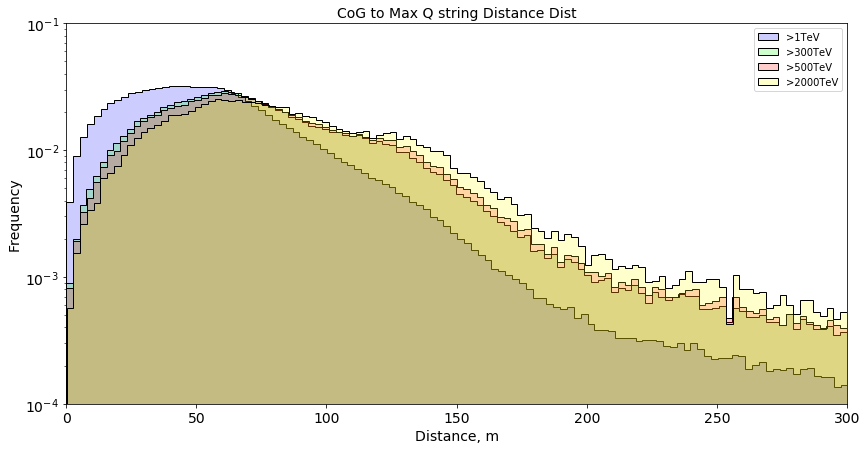

In [199]:
ax = cdf[b'Distance'].plot.hist(figsize = (14,7), bins = 300, weights = cdf['Weights'], logy= True, histtype ='step', fill=True, fc=(0, 0, 1, 0.2), edgecolor = 'k', label = ">1TeV", xlim =[0,300],ylim = [10**(-4),10**(-1)])
ax = cdf_300[b'Distance'].plot.hist(bins = 300, logy= True, weights = cdf_300['Weights'], histtype ='step',  fill=True, fc=(0, 1, 0, 0.2), edgecolor = 'k', label = ">300TeV")#, xlim =[0,1000], ylim = [10**(-4),10**(-0)])
ax = cdf_500[b'Distance'].plot.hist(bins = 300, logy= True, weights = cdf_500['Weights'], histtype ='step',  fill=True, fc=(1, 0, 0, 0.2), edgecolor = 'k', label = ">500TeV")#, xlim =[0,1000], ylim = [10**(-4),10**(-0)])
ax = cdf_2000[b'Distance'].plot.hist(bins = 300, logy= True, weights = cdf_2000['Weights'], histtype ='step',  fill=True, fc=(1, 1, 0, 0.2), edgecolor = 'k', label = ">2000TeV")#, xlim =[0,1000], ylim = [10**(-4),10**(-0)])
plt.legend()
ax.set_title('CoG to Max Q string Distance Dist', fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax.set_xlabel("Distance, m",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax.set_ylabel("Frequency",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax.tick_params(labelsize=14)

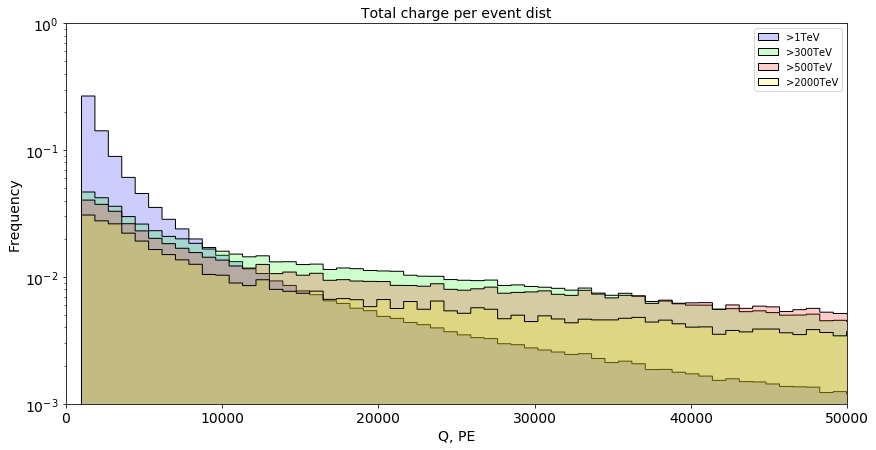

In [191]:
ax = cdf['Qtot_a'].plot.hist(figsize = (14,7), weights = cdf['Weights'], bins = 3000, logy= True, histtype ='step',  fill=True, fc=(0, 0, 1, 0.2), edgecolor = 'k', label = ">1TeV", xlim =[0,50000],ylim = [10**(-3),10**(-0)])
ax = cdf_300['Qtot_a'].plot.hist(bins = 3000, logy= True,weights = cdf_300['Weights'], histtype ='step', fill=True, fc=(0, 1, 0, 0.2), edgecolor = 'k', label = ">300TeV")#, xlim =[0,1000], ylim = [10**(-4),10**(-0)])
ax = cdf_500['Qtot_a'].plot.hist(bins = 3000, logy= True,weights = cdf_500['Weights'],histtype ='step',  fill=True, fc=(1, 0, 0, 0.2), edgecolor = 'k', label = ">500TeV")#, xlim =[0,1000], ylim = [10**(-4),10**(-0)])
ax = cdf_2000['Qtot_a'].plot.hist(bins = 3000, logy= True,weights = cdf_2000['Weights'], histtype ='step',fill=True, fc=(1, 1, 0, 0.2), edgecolor = 'k', label = ">2000TeV")#, xlim =[0,1000], ylim = [10**(-4),10**(-0)])
plt.legend()
ax.set_title('Total charge per event dist', fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax.set_xlabel("Q, PE",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax.set_ylabel("Frequency",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax.tick_params(labelsize=14)

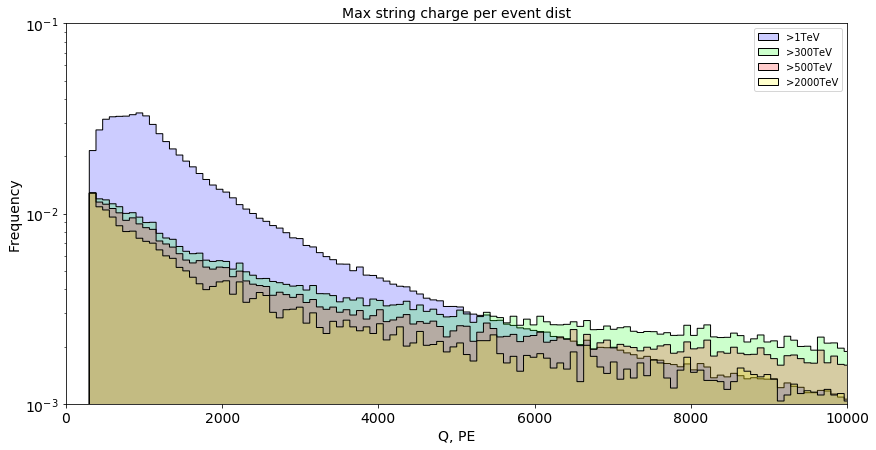

In [198]:
ax = cdf[b'Qst'].plot.hist(figsize = (14,7), weights = cdf['Weights'], bins = 6000, logy= True, histtype ='step',  fill=True, fc=(0, 0, 1, 0.2), edgecolor = 'k', label = ">1TeV", xlim =[0,10000],ylim = [10**(-3),10**(-1)])
ax = cdf_300[b'Qst'].plot.hist(bins = 6000, logy= True,weights = cdf_300['Weights'], histtype ='step', fill=True, fc=(0, 1, 0, 0.2), edgecolor = 'k', label = ">300TeV")#, xlim =[0,1000], ylim = [10**(-4),10**(-0)])
ax = cdf_500[b'Qst'].plot.hist(bins = 6000, logy= True,weights = cdf_500['Weights'],histtype ='step',  fill=True, fc=(1, 0, 0, 0.2), edgecolor = 'k', label = ">500TeV")#, xlim =[0,1000], ylim = [10**(-4),10**(-0)])
ax = cdf_2000[b'Qst'].plot.hist(bins = 6000, logy= True,weights = cdf_2000['Weights'], histtype ='step',fill=True, fc=(1, 1, 0, 0.2), edgecolor = 'k', label = ">2000TeV")#, xlim =[0,1000], ylim = [10**(-4),10**(-0)])
plt.legend()
ax.set_title('Max string charge per event dist', fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax.set_xlabel("Q, PE",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax.set_ylabel("Frequency",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax.tick_params(labelsize=14)

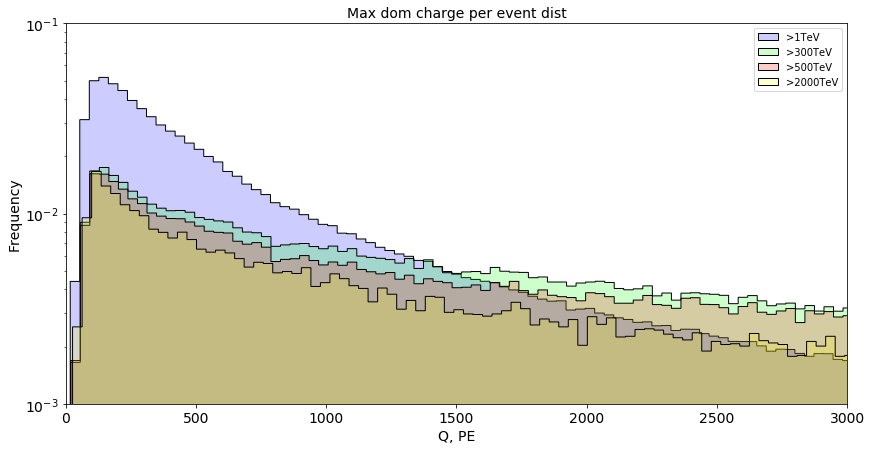

In [203]:
ax = cdf[b'Qdom'].plot.hist(figsize = (14,7), weights = cdf['Weights'], bins = 1000, logy= True, histtype ='step',  fill=True, fc=(0, 0, 1, 0.2), edgecolor = 'k', label = ">1TeV", xlim =[0,3000],ylim = [10**(-3),10**(-1)])
ax = cdf_300[b'Qdom'].plot.hist(bins = 1000, logy= True,weights = cdf_300['Weights'], histtype ='step', fill=True, fc=(0, 1, 0, 0.2), edgecolor = 'k', label = ">300TeV")#, xlim =[0,1000], ylim = [10**(-4),10**(-0)])
ax = cdf_500[b'Qdom'].plot.hist(bins = 1000, logy= True,weights = cdf_500['Weights'],histtype ='step',  fill=True, fc=(1, 0, 0, 0.2), edgecolor = 'k', label = ">500TeV")#, xlim =[0,1000], ylim = [10**(-4),10**(-0)])
ax = cdf_2000[b'Qdom'].plot.hist(bins = 1000, logy= True,weights = cdf_2000['Weights'], histtype ='step',fill=True, fc=(1, 1, 0, 0.2), edgecolor = 'k', label = ">2000TeV")#, xlim =[0,1000], ylim = [10**(-4),10**(-0)])
plt.legend()

ax.set_title('Max dom charge per event dist', fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax.set_xlabel("Q, PE",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax.set_ylabel("Frequency",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax.tick_params(labelsize=14)

In [204]:
cdf['QRatio'] = cdf[b'Qst']/cdf['Qtot_a'] 
cdf_300['QRatio'] = cdf_300[b'Qst']/cdf_300['Qtot_a'] 
cdf_500['QRatio'] = cdf_500[b'Qst']/cdf_500['Qtot_a'] 
cdf_2000['QRatio'] = cdf_2000[b'Qst']/cdf_2000['Qtot_a'] 

cdf['QDist'] = cdf[b'Qst']/cdf[b'Distance']
cdf_300['QDist'] = cdf_300[b'Qst']/cdf_300[b'Distance'] 
cdf_500['QDist'] = cdf_500[b'Qst']/cdf_500[b'Distance'] 
cdf_2000['QDist'] = cdf_2000[b'Qst']/cdf_2000[b'Distance'] 


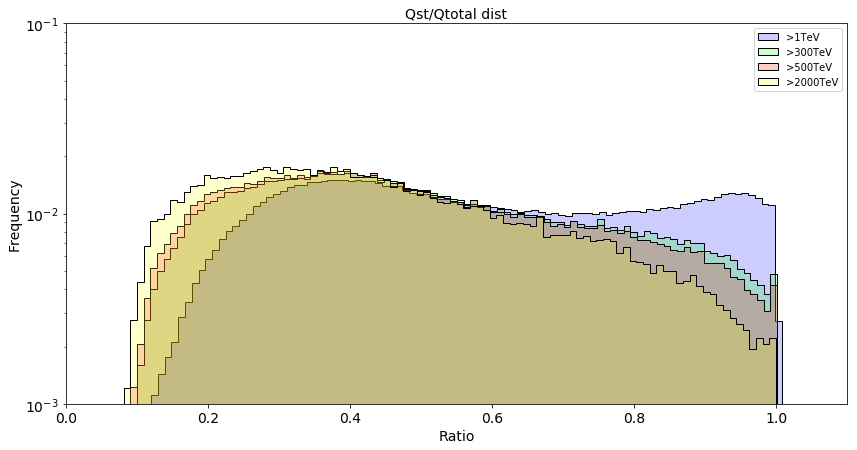

In [206]:
ax = cdf['QRatio'].plot.hist(figsize = (14,7), weights = cdf['Weights'], bins = 100, logy= True, histtype ='step',  fill=True, fc=(0, 0, 1, 0.2), edgecolor = 'k', label = ">1TeV", xlim =[0,1.1],ylim = [10**(-3),10**(-1)])
ax = cdf_300['QRatio'].plot.hist(bins = 100, logy= True,weights = cdf_300['Weights'], histtype ='step', fill=True, fc=(0, 1, 0, 0.2), edgecolor = 'k', label = ">300TeV")#, xlim =[0,1000], ylim = [10**(-4),10**(-0)])
ax = cdf_500['QRatio'].plot.hist(bins = 100, logy= True,weights = cdf_500['Weights'],histtype ='step',  fill=True, fc=(1, 0, 0, 0.2), edgecolor = 'k', label = ">500TeV")#, xlim =[0,1000], ylim = [10**(-4),10**(-0)])
ax = cdf_2000['QRatio'].plot.hist(bins = 100, logy= True,weights = cdf_2000['Weights'], histtype ='step',fill=True, fc=(1, 1, 0, 0.2), edgecolor = 'k', label = ">2000TeV")#, xlim =[0,1000], ylim = [10**(-4),10**(-0)])
plt.legend()
ax.set_title('Qst/Qtotal dist', fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax.set_xlabel("Ratio",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax.set_ylabel("Frequency",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax.tick_params(labelsize=14)

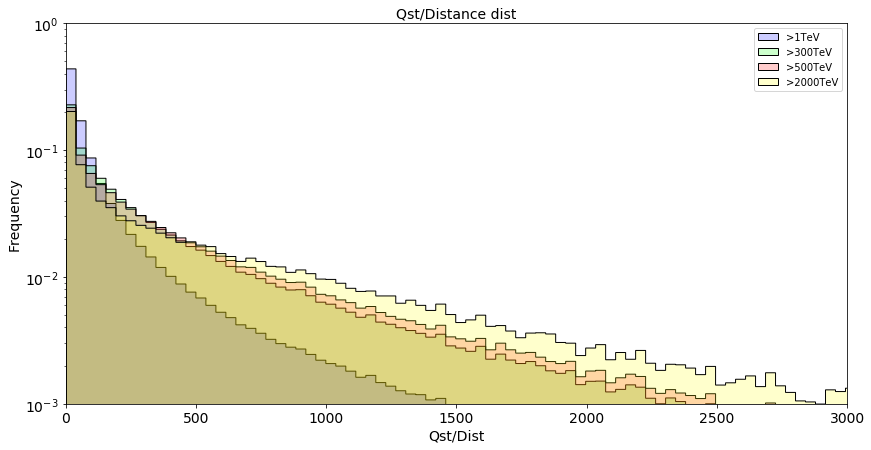

In [213]:
ax = cdf['QDist'].plot.hist(figsize = (14,7), weights = cdf['Weights'], bins = 5000, logy= True, histtype ='step',  fill=True, fc=(0, 0, 1, 0.2), edgecolor = 'k', label = ">1TeV", xlim =[0,3000],ylim = [10**(-3),10**(-0)])
ax = cdf_300['QDist'].plot.hist(bins = 5000, logy= True,weights = cdf_300['Weights'], histtype ='step', fill=True, fc=(0, 1, 0, 0.2), edgecolor = 'k', label = ">300TeV")#, xlim =[0,1000], ylim = [10**(-4),10**(-0)])
ax = cdf_500['QDist'].plot.hist(bins = 5000, logy= True,weights = cdf_500['Weights'],histtype ='step',  fill=True, fc=(1, 0, 0, 0.2), edgecolor = 'k', label = ">500TeV")#, xlim =[0,1000], ylim = [10**(-4),10**(-0)])
ax = cdf_2000['QDist'].plot.hist(bins = 5000, logy= True,weights = cdf_2000['Weights'], histtype ='step',fill=True, fc=(1, 1, 0, 0.2), edgecolor = 'k', label = ">2000TeV")#, xlim =[0,1000], ylim = [10**(-4),10**(-0)])
plt.legend()

ax.set_title('Qst/Distance dist', fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax.set_xlabel("Qst/Dist",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax.set_ylabel("Frequency",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax.tick_params(labelsize=14)

In [140]:
cdf.head()

,b'Distance',b'Energy',b'ID',b'PDG',b'Qdom',b'Qst',b'StQArr',CoG_x,CoG_y,CoG_z,...,Qtot_a,Qtot_b,St_1,St_2,St_3,Qst_2,Qst_3,Weights,QRatio,QDist
0,75.477986,32.941243,"(1, 4294967295, 0, 0)",-15.0,265.774999,1103.649997,"((0.32499998807907104, 8), (0.4250000119209289...",-225.508865,-72.247663,-440.158867,...,2152.299998,2187.974997,34.0,33.0,43.0,330.850000,220.150000,0.000001,0.512777,14.622144
1,108.641289,8.402454,"(1, 4294967295, 1, 0)",15.0,593.950000,1204.600002,"((0.17499999701976776, 1), (0.4250000119209289...",-269.327879,21.798234,-451.623276,...,1499.250002,1537.550002,43.0,52.0,53.0,53.350000,48.400000,0.000001,0.803468,11.087866
4,48.367606,15.940907,"(1, 4294967295, 10, 0)",-15.0,68.225000,400.750001,"((0.4749999940395355, 15), (0.574999988079071,...",174.747778,225.631006,-338.593133,...,1518.475002,1590.775001,56.0,65.0,57.0,371.850000,339.850000,0.000001,0.263916,8.285504
5,91.572684,14.459175,"(1, 4294967295, 11, 0)",-15.0,82.800000,424.750000,"((0.32499998807907104, 32), (0.324999988079071...",-114.790392,-103.173392,-347.705273,...,1544.275001,1589.150001,34.0,25.0,35.0,360.899999,154.725000,0.000001,0.275048,4.638392
7,119.392320,614.209645,"(1, 4294967295, 24, 0)",15.0,1205.199999,5091.650001,"((0.4749999940395355, 21), (0.625, 49), (0.824...",-338.775469,106.956783,-452.925792,...,7825.500004,7894.125003,52.0,43.0,53.0,972.900000,460.200001,0.000001,0.650649,42.646378


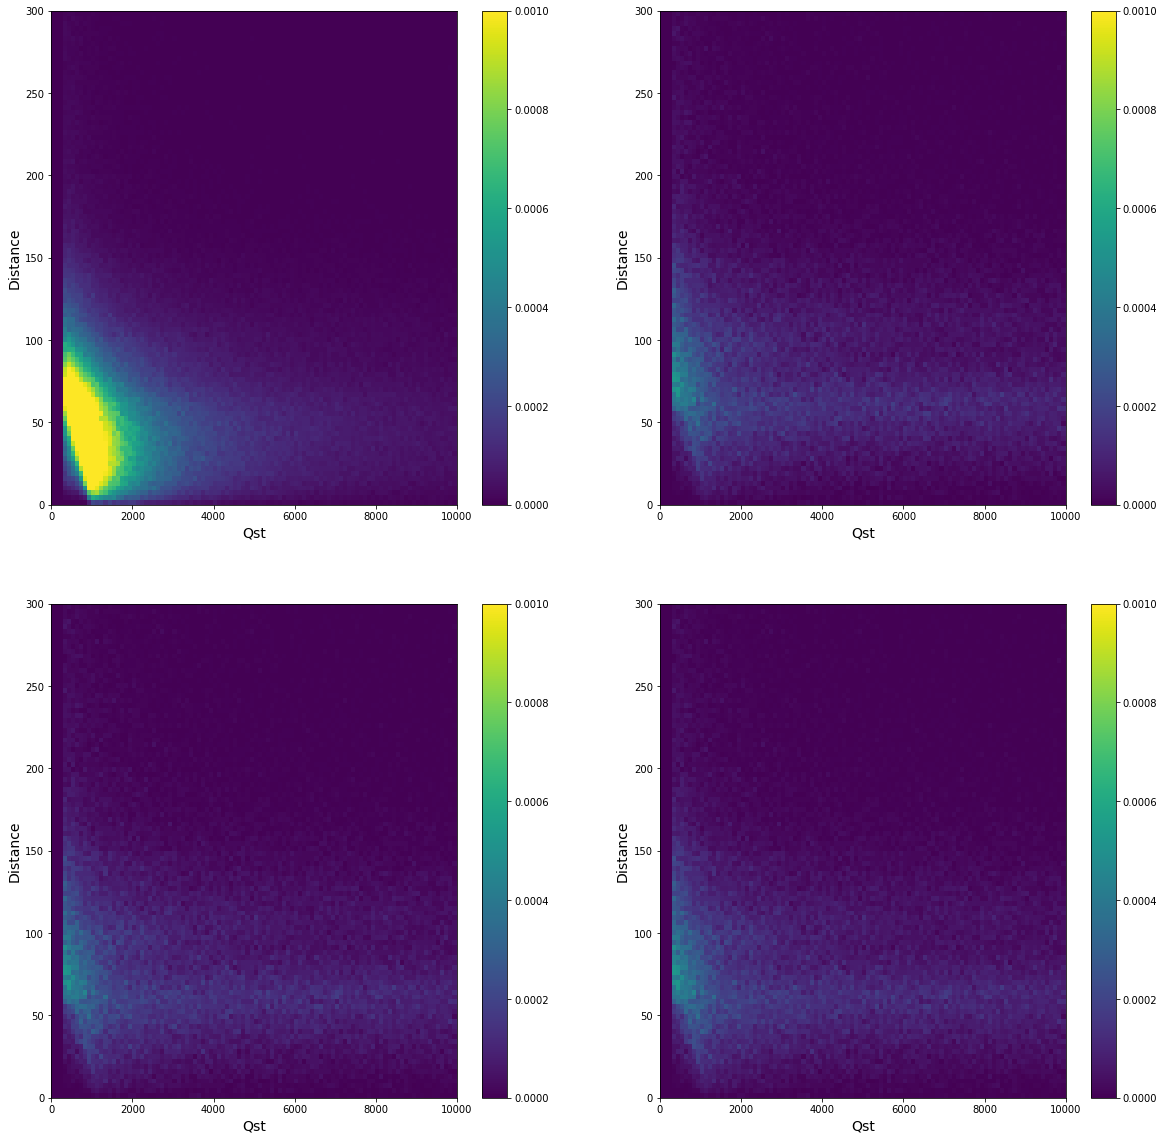

In [233]:
fig, ax = plt.subplots(nrows=2, ncols=2,sharex = True,sharey=True, figsize=(20,20))
plt.title('Qst/Distance dist', fontdict={'fontsize': 14, 'fontweight': 'medium'})

plt.subplot(2,2,1)
plt.hist2d(x= cdf[b'Qst'], y= cdf[b'Distance'], weights = cdf['Weights'], bins =100, range=[[0,10000],[0,300]],vmax = 0.001)
plt.xlabel("Qst",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("Distance",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.colorbar()

plt.subplot(2,2,2)
plt.hist2d(x= cdf_300[b'Qst'], y= cdf_300[b'Distance'], weights = cdf_300['Weights'], bins =100, range=[[0,10000],[0,300]],vmax = 0.001)
plt.xlabel("Qst",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("Distance",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.colorbar()

plt.subplot(2,2,3)
plt.hist2d(x= cdf_300[b'Qst'], y= cdf_300[b'Distance'], weights = cdf_300['Weights'], bins =100, range=[[0,10000],[0,300]],vmax = 0.001)
plt.xlabel("Qst",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("Distance",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.colorbar()

plt.subplot(2,2,4)
plt.hist2d(x= cdf_300[b'Qst'], y= cdf_300[b'Distance'], weights = cdf_300['Weights'], bins =100, range=[[0,10000],[0,300]],vmax = 0.001)
plt.xlabel("Qst",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("Distance",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.colorbar()
plt.xlabel("Qst",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("Distance",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.show()

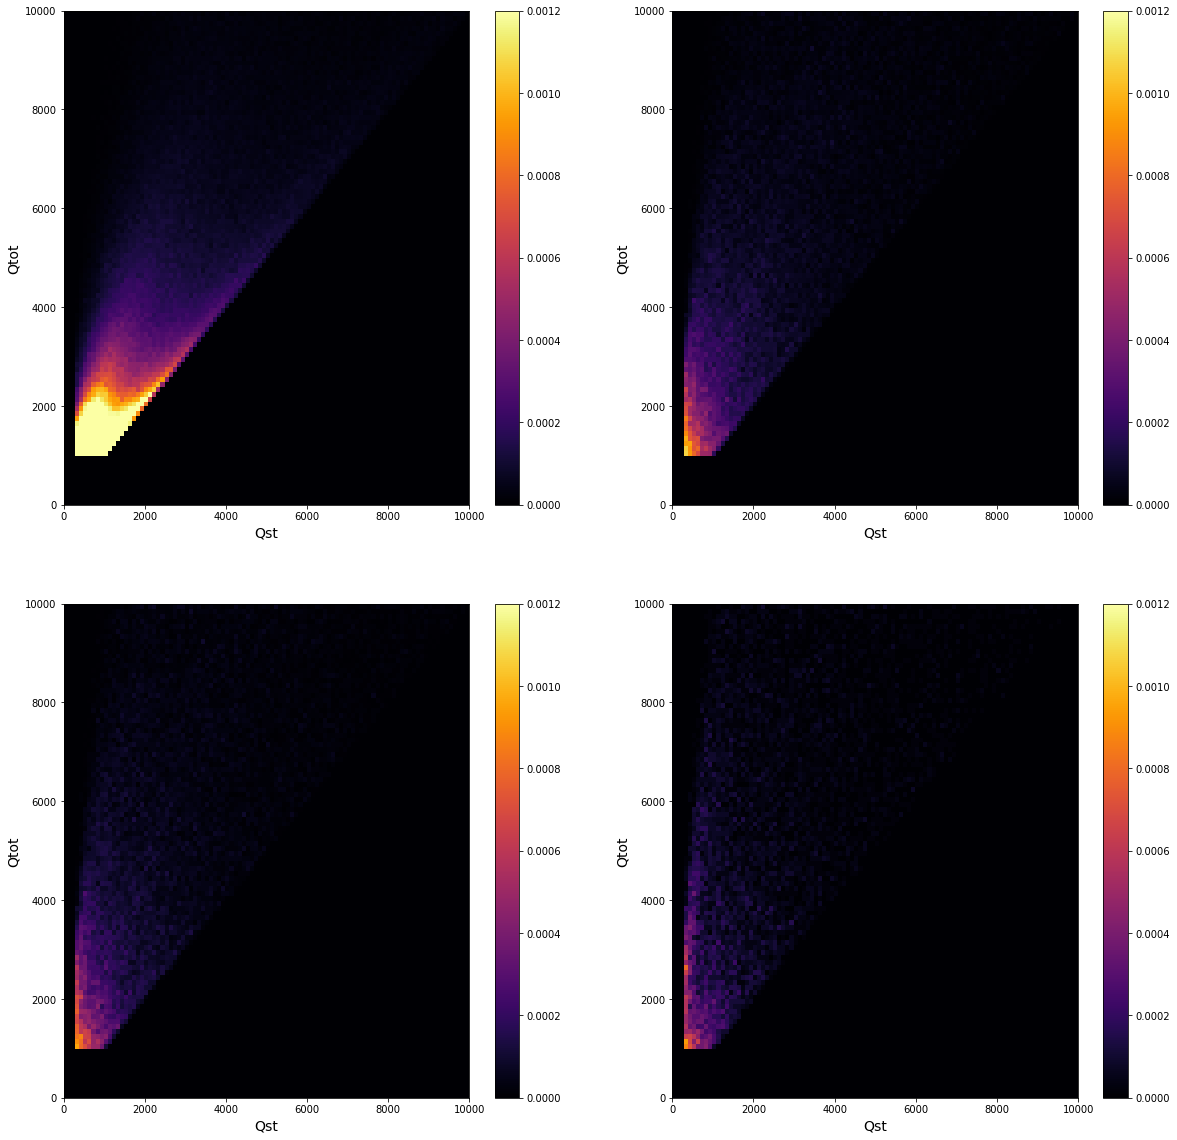

In [228]:
fig, ax = plt.subplots(nrows=2, ncols=2,sharex = True,sharey=True, figsize=(20,20))
plt.title('Qst/Qtot dist', fontdict={'fontsize': 14, 'fontweight': 'medium'})

plt.subplot(2,2,1)
plt.hist2d(x= cdf[b'Qst'], y= cdf['Qtot_a'], weights = cdf['Weights'], bins =100, range=[[0,10000],[0,10000]],cmap = 'inferno', vmax =0.0012)
plt.xlabel("Qst",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("Qtot",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.colorbar()

plt.subplot(2,2,2)
plt.hist2d(x= cdf_300[b'Qst'], y= cdf_300['Qtot_a'], weights = cdf_300['Weights'], bins =100, range=[[0,10000],[0,10000]],cmap = 'inferno', vmax =0.0012)
plt.xlabel("Qst",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("Qtot",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.colorbar()

plt.subplot(2,2,3)
plt.hist2d(x= cdf_500[b'Qst'], y= cdf_500['Qtot_a'], weights = cdf_500['Weights'], bins =100, range=[[0,10000],[0,10000]],cmap = 'inferno', vmax =0.0012)
plt.xlabel("Qst",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("Qtot",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.colorbar()

plt.subplot(2,2,4)
plt.hist2d(x= cdf_2000[b'Qst'], y= cdf_2000['Qtot_a'], weights = cdf_2000['Weights'], bins =100, range=[[0,10000],[0,10000]],cmap = 'inferno', vmax =0.0012)
plt.xlabel("Qst",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("Qtot",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.colorbar()
plt.show()

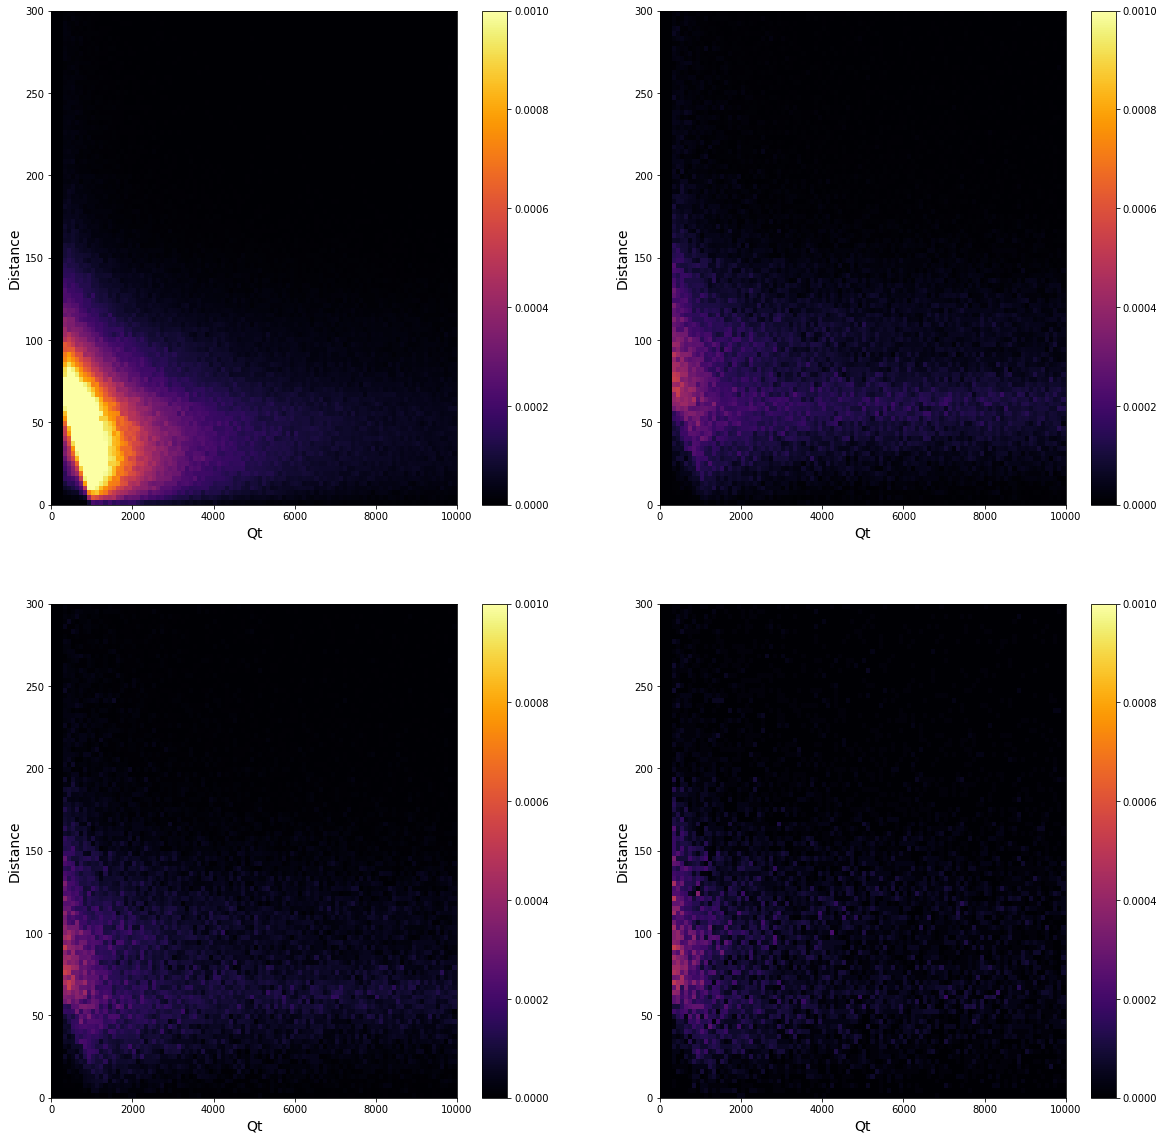

In [230]:
fig, ax = plt.subplots(nrows=2, ncols=2,sharex = True,sharey=True, figsize=(20,20))
plt.title("Qtot vs Dist", fontdict={'fontsize': 14, 'fontweight': 'medium'})

plt.subplot(2,2,1)
plt.hist2d(x= cdf[b'Qst'], y= cdf[b'Distance'], weights = cdf['Weights'], bins =100, range=[[0,10000],[0,300]],cmap = 'inferno', vmax =0.001)
plt.xlabel("Qt",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("Distance",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.colorbar()

plt.subplot(2,2,2)
plt.hist2d(x= cdf_300[b'Qst'], y= cdf_300[b'Distance'], weights = cdf_300['Weights'], bins =100, range=[[0,10000],[0,300]],cmap = 'inferno', vmax =0.001)
plt.xlabel("Qt",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("Distance",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.colorbar()

plt.subplot(2,2,3)
plt.hist2d(x= cdf_500[b'Qst'], y= cdf_500[b'Distance'], weights = cdf_500['Weights'], bins =100, range=[[0,10000],[0,300]],cmap = 'inferno', vmax =0.001)
plt.xlabel("Qt",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("Distance",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.colorbar()

plt.subplot(2,2,4)
plt.hist2d(x= cdf_2000[b'Qst'], y= cdf_2000[b'Distance'], weights = cdf_2000['Weights'], bins =100, range=[[0,10000],[0,300]],cmap = 'inferno', vmax =0.001)
plt.xlabel("Qt",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("Distance",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.colorbar()
plt.show()


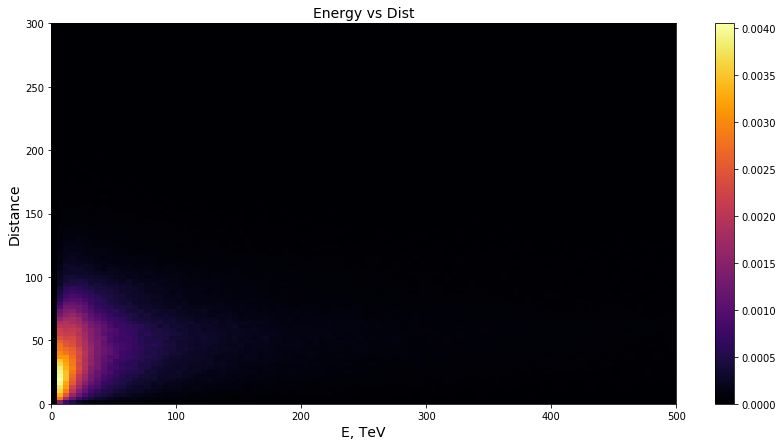

In [144]:
plt.figure(figsize=(14,7))
plt.hist2d(x= cdf[b'Energy'], y= cdf[b'Distance'], weights = cdf['Weights'], bins =100, range=[[0,500],[0,300]],cmap = 'inferno')
plt.colorbar()
plt.title("Energy vs Dist", fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.xlabel("E, TeV",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("Distance",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.show()

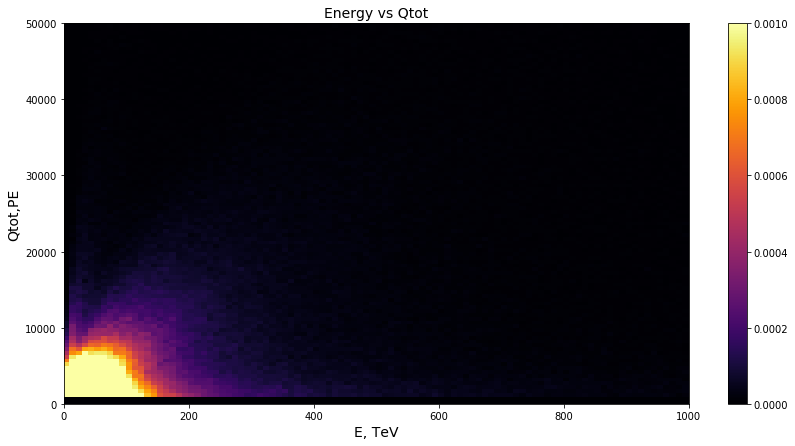

In [145]:
plt.figure(figsize=(14,7))
plt.hist2d(x= cdf[b'Energy'], y= cdf['Qtot_a'], weights = cdf['Weights'], bins =100, range=[[0,1000],[0,50000]],cmap = 'inferno', vmax=0.001)
plt.colorbar()
plt.title("Energy vs Qtot", fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.xlabel("E, TeV",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("Qtot,PE",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.show()

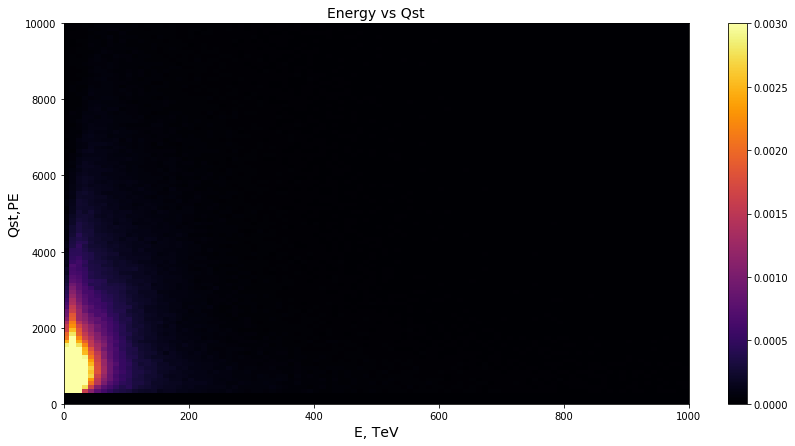

In [146]:
plt.figure(figsize=(14,7))
plt.hist2d(x= cdf[b'Energy'], y= cdf[b'Qst'], weights = cdf['Weights'], bins =100, range=[[0,1000],[0,10000]],cmap = 'inferno', vmax=0.003)
plt.colorbar()
plt.title("Energy vs Qst", fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.xlabel("E, TeV",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("Qst,PE",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.show()